# ANALISIS DATA NILAI MAHASISWA MENGGUNAKAN PYTHON

Pada project ini dilakukan proses analisis sederhana terhadap data nilai mahasiswa yang diambil dari sebuah file CSV.  
Tujuan utama dari analisis ini adalah untuk memahami informasi dasar dari dataset, seperti:

- Menampilkan nama dan nilai mahasiswa
- Menentukan kategori nilai menggunakan fungsi khusus
- Menghitung rata-rata nilai seluruh mahasiswa
- Menentukan apakah rata-rata kelas memenuhi kriteria kelulusan
- Membuat visualisasi data berupa grafik batang dan histogram untuk melihat pola nilai

Secara keseluruhan, project ini membantu mempelajari cara:
1. Membaca dan memproses data dari file CSV  
2. Menggunakan struktur data Python seperti list dan dictionary  
3. Mengaplikasikan fungsi dan kontrol alur program  
4. Melakukan visualisasi menggunakan *matplotlib*  
5. Menyimpulkan hasil analisis berdasarkan data yang ada

Analisis ini dapat dijadikan dasar untuk pemahaman pengolahan data tingkat awal dan visualisasi data dalam Python.


In [17]:
import csv
import matplotlib.pyplot as plt

## 2. Membaca File CSV

Script di bawah digunakan untuk membuka dan membaca file CSV berisi data mahasiswa.

### Penjelasan:
1. `with open(...):`  
   Membuka file CSV dalam mode baca (`"r"`).  
   Penggunaan `utf-8-sig` berfungsi menghilangkan karakter BOM seperti `ï»¿` yang sering muncul di awal file.

2. `csv.DictReader(file, delimiter=';')`  
   Membaca file CSV sebagai bentuk dictionary per baris.  
   Setiap baris terdiri dari pasangan key-value sesuai nama kolom.

3. `data = list(reader)`  
   Mengubah hasil pembacaan menjadi list agar data mudah diolah.



In [19]:
data = []

try:
    with open("nilai_mahasiswa.csv", "r", encoding="utf-8-sig") as file:
        reader = csv.DictReader(file, delimiter=";")

        for row in reader:
            row["Nilai"] = int(row["Nilai"])
            data.append(row)

    print("File berhasil dibaca!")
except FileNotFoundError:
    print("❌ File tidak ditemukan!")
except Exception as e:
    print("Terjadi error:", e)

data[:5]


File berhasil dibaca!


[{'NIM': '124400001',
  'Nama': 'Bima',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 85},
 {'NIM': '124400002',
  'Nama': 'Noel',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 90},
 {'NIM': '124400003',
  'Nama': 'David',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 78},
 {'NIM': '124400004',
  'Nama': 'Adit',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 88},
 {'NIM': '124400005',
  'Nama': 'Agung',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 92}]

## 3.Preprocessing Data

Kode berikut digunakan untuk membersihkan spasi pada setiap nilai di kolom **Nama** dan **Prodi**:

- `for row in data:`  
  Melakukan iterasi pada setiap baris data.

- `row["Nama"] = row["Nama"].strip()`  
  Menghapus spasi di awal/akhir teks pada kolom Nama.

- `row["Prodi"] = row["Prodi"].strip()`  
  Menghapus spasi berlebih pada kolom Prodi.

- `print("Preprocessing selesai!")`  
  Menandakan proses pembersihan data selesai dilakukan.


In [20]:

for row in data:
    row["Nama"] = row["Nama"].strip()
    row["Prodi"] = row["Prodi"].strip()

print("Preprocessing selesai!")


Preprocessing selesai!


### 4.Fungsi Kategori Nilai

Fungsi ini digunakan untuk menentukan kategori huruf dari nilai numerik.

- **Input:** `n` → nilai numerik (misal 0–100)  
- **Output:** kategori huruf `"A"`, `"B"`, `"C"`, atau `"D"`  

**Logika Fungsi:**

1. Jika nilai ≥ 85 → `"A"`  
2. Jika nilai ≥ 75 dan < 85 → `"B"`  
3. Jika nilai ≥ 65 dan < 75 → `"C"`  
4. Jika nilai < 65 → `"D"` 

In [22]:
def kategori_nilai(n):
    if n >= 85:
        return "A"
    elif n >= 75:
        return "B"
    elif n >= 65:
        return "C"
    else:
        return "D"


### 5.Fungsi `panjang_nama`

Fungsi ini digunakan untuk menghitung jumlah karakter pada sebuah nama.

- **Definisi Fungsi:**  
  Fungsi dibuat menggunakan **lambda function**, yaitu fungsi singkat tanpa `def`.


In [23]:
panjang_nama = lambda nama: len(nama)
print("Contoh panjang nama 'Bima':", panjang_nama("Bima"))


Contoh panjang nama 'Bima': 4


### 6.Menambahkan Kategori Nilai dan Menampilkan Data

Script ini digunakan untuk **menambahkan kolom `Kategori`** pada dataset `data` berdasarkan nilai pada kolom `Nilai`, lalu menampilkan beberapa baris pertama.Disini menggunakan 7 baris pertama data[7]

In [24]:
for row in data:
    row["Kategori"] = kategori_nilai(row["Nilai"])

data[:7]


[{'NIM': '124400001',
  'Nama': 'Bima',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 85,
  'Kategori': 'A'},
 {'NIM': '124400002',
  'Nama': 'Noel',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 90,
  'Kategori': 'A'},
 {'NIM': '124400003',
  'Nama': 'David',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 78,
  'Kategori': 'B'},
 {'NIM': '124400004',
  'Nama': 'Adit',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 88,
  'Kategori': 'A'},
 {'NIM': '124400005',
  'Nama': 'Agung',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 92,
  'Kategori': 'A'},
 {'NIM': '124400006',
  'Nama': 'Dias',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 75,
  'Kategori': 'B'},
 {'NIM': '124400007',
  'Nama': 'Panda',
  'Prodi': 'Teknik Telekomunikasi',
  '': '',
  'Nilai': 80,
  'Kategori': 'B'}]

### 7.Menghitung Rata-Rata Nilai

Script ini digunakan untuk menghitung **rata-rata nilai** dari dataset `data`.

In [25]:
total = 0
for row in data:
    total += row["Nilai"]

rata2 = total / len(data)
print("Rata-rata nilai:", round(rata2, 2))


Rata-rata nilai: 84.36


### 8.Menentukan Status Kelulusan Kelas

Script ini digunakan untuk mengecek apakah **rata-rata kelas** memenuhi kriteria kelulusan.

In [26]:
if rata2 >= 75:
    print("Rata-rata kelas LULUS")
else:
    print("Rata-rata kelas TIDAK LULUS")


Rata-rata kelas LULUS


### 9.Menampilkan Daftar Nama Mahasiswa

Script ini digunakan untuk **menampilkan semua nama mahasiswa** dari dataset `data`.  
Tujuannya agar kita bisa melihat siapa saja mahasiswa yang datanya sudah tersedia.


In [27]:
print("Daftar Nama Mahasiswa:")
for row in data:
    print("-", row["Nama"])


Daftar Nama Mahasiswa:
- Bima
- Noel
- David
- Adit
- Agung
- Dias
- Panda
- Michael
- Chris
- John
- Mike


### 10.Input Nilai Mahasiswa dengan Penanganan Error

Script ini memungkinkan pengguna untuk **memasukkan nilai secara manual** dan langsung menampilkan kategori nilainya.  
Selain itu, script ini juga **menangani kesalahan input** jika pengguna memasukkan sesuatu yang bukan angka.

In [30]:
try:
    nilai_input = int(input("Masukkan nilai Anda: "))
    print("Kategori =", kategori_nilai(nilai_input))
except ValueError:
    print("❌ Error: Input harus berupa angka!")


Masukkan nilai Anda:  70


Kategori = C


In [16]:
nama = [row["Nama"] for row in data]
nilai = [row["Nilai"] for row in data]


### 12.Visualisasi Nilai Mahasiswa dengan Grafik Batang

Script ini digunakan untuk **menampilkan nilai mahasiswa secara visual** menggunakan grafik batang (`bar chart`).  
Grafik ini memudahkan kita untuk membandingkan nilai setiap mahasiswa dengan cepat.

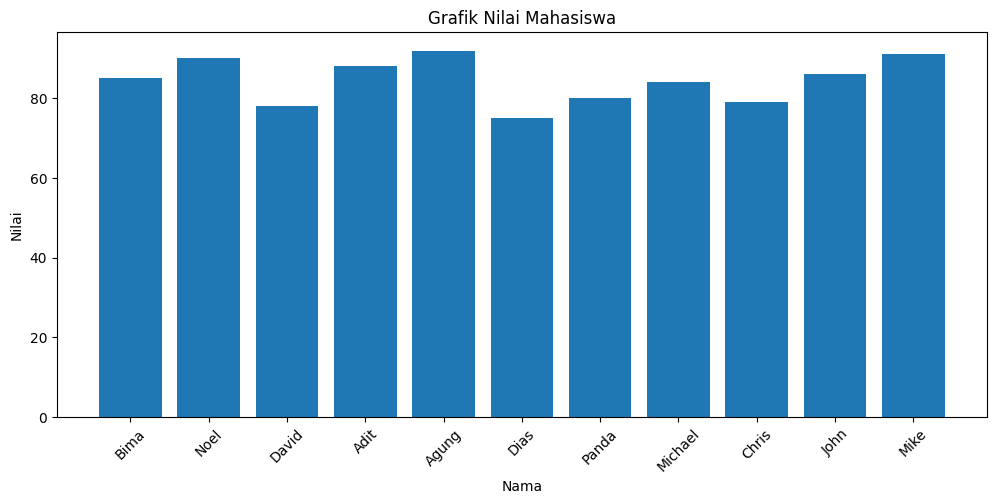

In [30]:
plt.figure(figsize=(12,5))
plt.bar(nama, nilai)
plt.xticks(rotation=45)
plt.title("Grafik Nilai Mahasiswa")
plt.xlabel("Nama")
plt.ylabel("Nilai")
plt.show()


### 13.Visualisasi Distribusi Nilai Mahasiswa dengan Histogram

Script ini digunakan untuk **menampilkan distribusi nilai mahasiswa** menggunakan histogram.  
Histogram memudahkan kita melihat sebaran nilai dan frekuensi masing-masing rentang nilai.


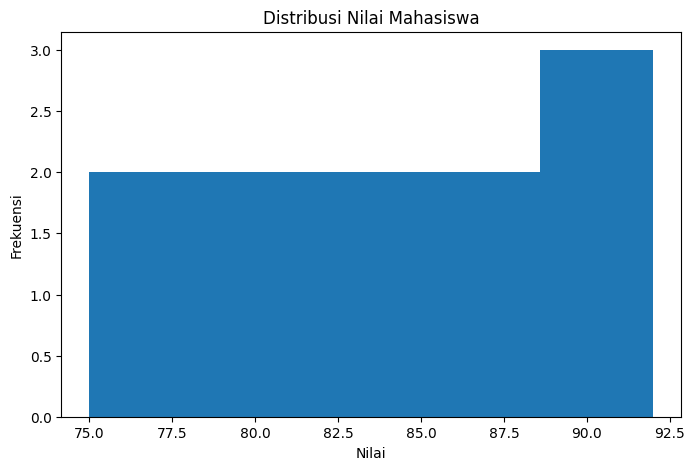

In [31]:
plt.figure(figsize=(8,5))
plt.hist(nilai, bins=5)
plt.title("Distribusi Nilai Mahasiswa")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()


Kesimpulan:
1. File CSV berhasil dibaca menggunakan modul csv.
2. Nilai mahasiswa diproses secara manual menggunakan perulangan.
3. Fungsi def dan lambda digunakan untuk mengelompokkan data.
4. Percabangan dan looping digunakan dalam proses analisis.
5. Visualisasi grafik berhasil dibuat menggunakan matplotlib.
6. Projek memenuhi seluruh struktur minimal mini project.

Projek dapat dikembangkan dengan menambahkan penyimpanan hasil analisis ke file TXT/JSON atau membuat menu interaktif.
